In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline



In [4]:
data = pd.read_csv("C:/Users/hp/Desktop/house_data.csv")
data.head()



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.shape


(21613, 21)

In [6]:
data.describe(include=[np.number])


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data.isnull().sum()  


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

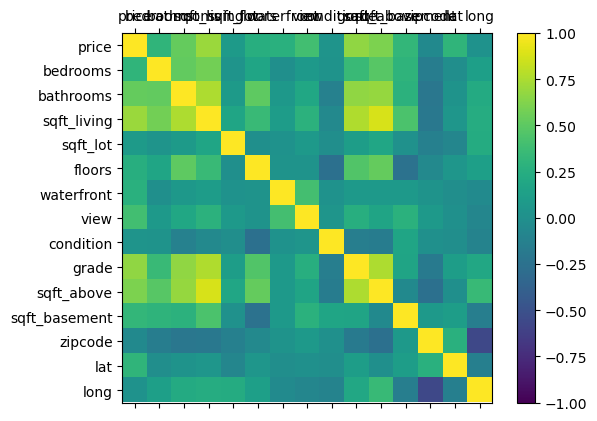

In [8]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [12]:
data['waterfront'] = data['waterfront'].astype('category')
data['view'] = data['view'].astype('category')
data['condition'] = data['condition'].astype('category')
data['grade'] = data['grade'].astype('category')
data['zipcode'] = data['zipcode'].astype('category')


In [10]:
data.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<Axes: xlabel='sqft_living', ylabel='price'>

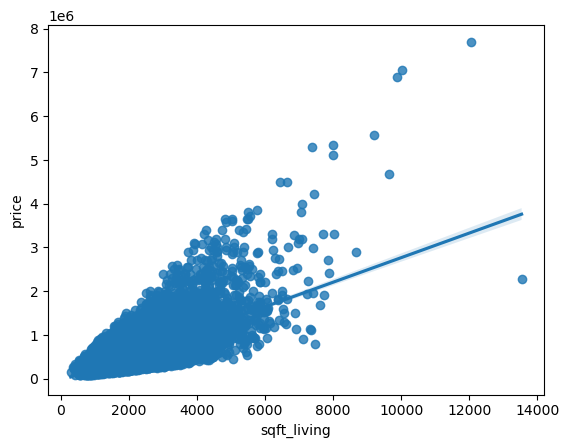

In [13]:
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

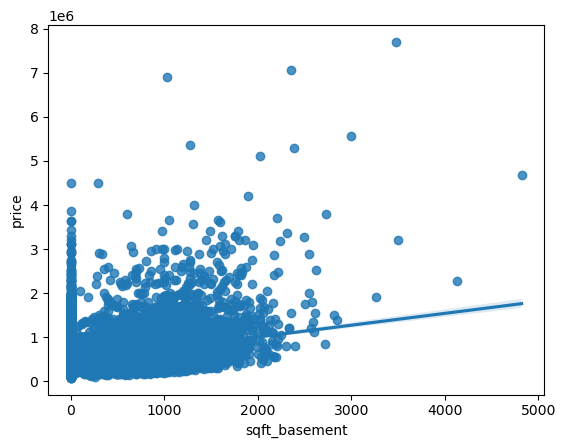

In [14]:
sns.regplot(x='sqft_basement',y='price',data=data)

<Axes: xlabel='sqft_above', ylabel='price'>

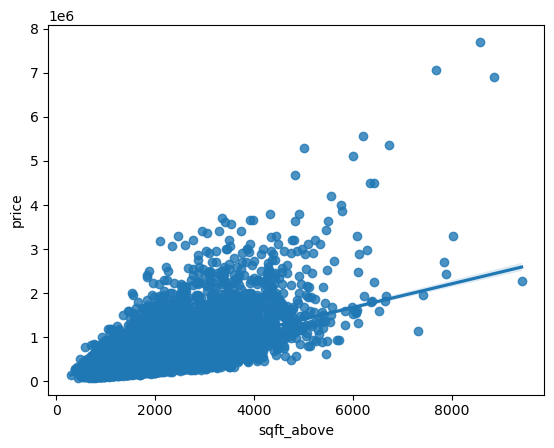

In [15]:
sns.regplot(x='sqft_above',y='price',data=data)


<Axes: xlabel='bedrooms', ylabel='price'>

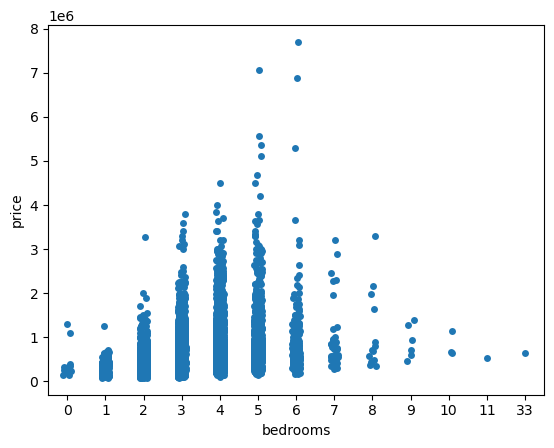

In [16]:
sns.stripplot(x='bedrooms', y='price',data=data)


<Axes: xlabel='bathrooms', ylabel='price'>

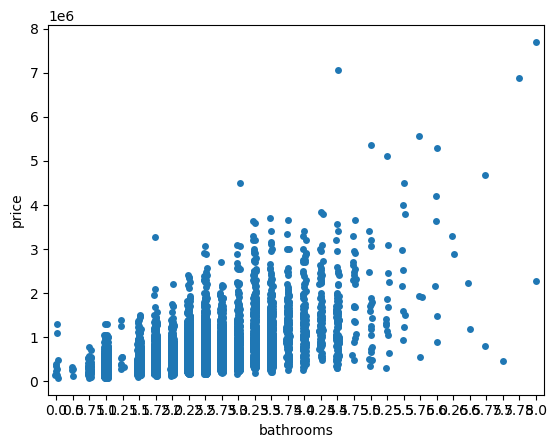

In [17]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)


<Axes: xlabel='grade', ylabel='price'>

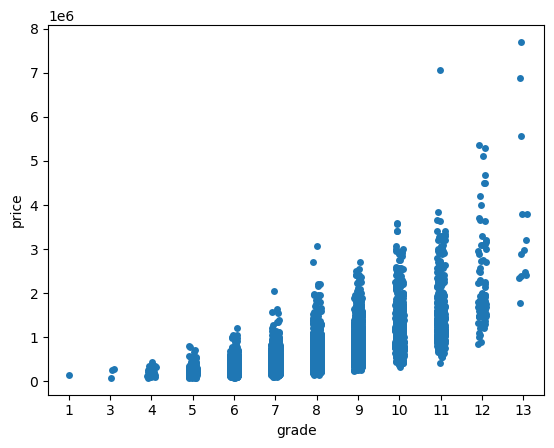

In [18]:
sns.stripplot(x='grade', y='price',data=data, size=5)


In [19]:
data=data[data['bedrooms'] < 10]


In [20]:
data=data[data['bathrooms']<8]


In [21]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [23]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)


In [24]:
y=data['price']


In [25]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)


In [26]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19151,3,2.50,1830,1830,False,False,False,False,False,True,False,False,False,False,False
6248,4,2.50,2310,2310,False,False,False,False,False,True,False,False,False,False,False
13665,4,1.50,1800,1800,False,False,False,False,True,False,False,False,False,False,False
7241,4,2.50,2740,2740,False,False,False,False,False,True,False,False,False,False,False
17293,3,1.75,1280,1030,False,False,False,False,False,True,False,False,False,False,False


In [27]:
reg=LinearRegression()


In [28]:
reg.fit(x_train,y_train)

LinearRegression()

In [29]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))

58175041681.16266


In [30]:
reg.score(x_test,y_test)

0.5946909070826021

In [31]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [32]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)


In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.18187985e+04  2.71494878e+04  3.99129792e+12  2.91716515e-01
 -3.06086773e+04 -3.99129792e+12 -3.99129792e+12 -3.13628835e+02
  2.23236719e+01  2.09263427e+05 -1.81654537e+05  1.57792969e+01
 -1.57226562e-01  5.48679498e+05  9.31514650e+04  7.71499672e+04
  1.42081493e+05  3.16622100e+05  8.50691318e+04  8.86772808e+04
  1.14806109e+05  1.55348271e+05  2.93524171e+04 -4.76645726e+04
 -8.95460931e+04 -9.17165881e+04 -8.72248247e+04 -6.55981986e+04
  1.01863603e+04  1.27059967e+05  3.30235838e+05  7.23455960e+05
  1.37852048e+06  1.97364803e+04 -1.13257553e+04  7.22563836e+05
  2.68565044e+05  2.23039168e+05  2.17724270e+05  2.30656562e+05
  1.04476389e+05  5.46572842e+04  8.93058615e+04  6.89962972e+04
  6.34614170e+04 -4.22246989e+04  1.73368814e+05  1.66546571e+05
  4.67602438e+04  2.20989758e+05  1.40606994e+04  1.47169866e+04
 -1.10320885e+04  2.98830630e+05  1.29075605e+05  7.01043671e+04
  1.11528212e+06  4.65756221e+05  2.40801085e+04  1.58209428e+05
  1.95277

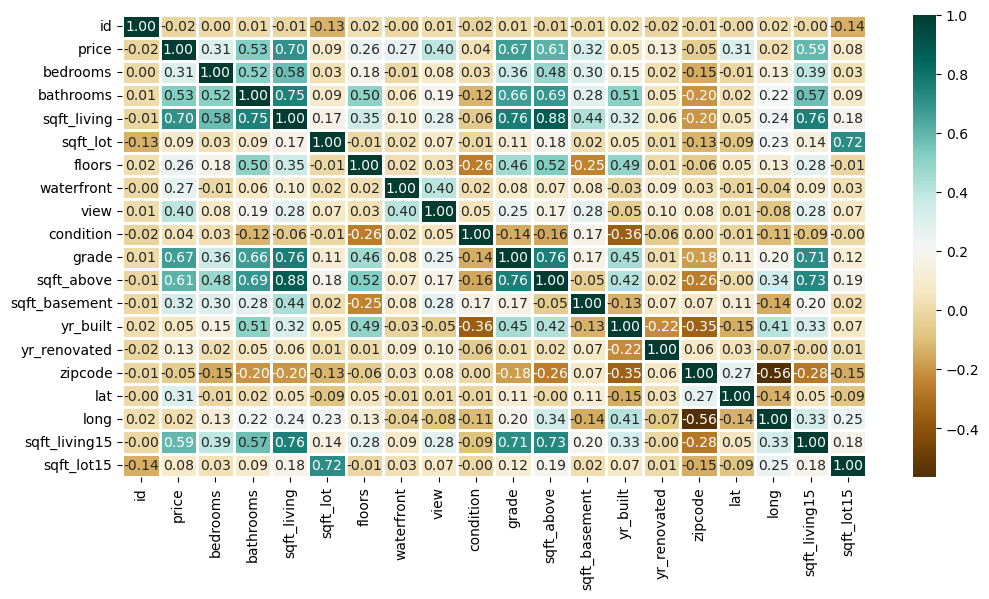

In [36]:
import seaborn as sns

# Assuming 'dataset' is your DataFrame
numerical_columns = dataset.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)
plt.show()
